In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Replace this with your actual file path!
file_path = r'C:\\Users\\prave\\OneDrive\\Desktop\\College\\Course 8 - Capstone_Business Intelligence and Data Analytics\\Data_set\\Medicare_IP_Hospitals_by_Provider_and_Service_2023.csv'

# Read the CSV file
df3 = pd.read_csv(file_path, encoding='latin1')

# Clean column names just in case
df3.columns = df3.columns.str.strip()

# Preview the first few rows
df3.head()

,ï»¿Rndrng_Prvdr_CCN,Rndrng_Prvdr_Org_Name,Rndrng_Prvdr_City,Rndrng_Prvdr_St,Rndrng_Prvdr_State_FIPS,Rndrng_Prvdr_Zip5,Rndrng_Prvdr_State_Abrvtn,Rndrng_Prvdr_RUCA,Rndrng_Prvdr_RUCA_Desc,DRG_Cd,DRG_Desc,Tot_Dschrgs,Avg_Submtd_Cvrd_Chrg,Avg_Tot_Pymt_Amt,Avg_Mdcr_Pymt_Amt
0,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,Metropolitian,Metropolitan area high commuting: primary flow...,3,ECMO OR TRACHEOSTOMY WITH MV >96 HOURS OR PRIN...,14,"$663,764.36","$120,219.93","$115,544.14"
1,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,Metropolitian,Metropolitan area high commuting: primary flow...,23,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,26,"$180,980.88","$37,321.04","$35,261.81"
2,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,Metropolitian,Metropolitan area high commuting: primary flow...,24,CRANIOTOMY WITH MAJOR DEVICE IMPLANT OR ACUTE ...,12,"$105,824.33","$26,936.67","$25,048.92"
3,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,Metropolitian,Metropolitan area high commuting: primary flow...,25,CRANIOTOMY AND ENDOVASCULAR INTRACRANIAL PROCE...,16,"$242,539.50","$34,745.38","$32,438.63"
4,10001,Southeast Health Medical Center,Dothan,1108 Ross Clark Circle,1,36301,AL,Metropolitian,Metropolitan area high commuting: primary flow...,38,EXTRACRANIAL PROCEDURES WITH CC,11,"$122,741.18","$14,999.82","$9,579.36"


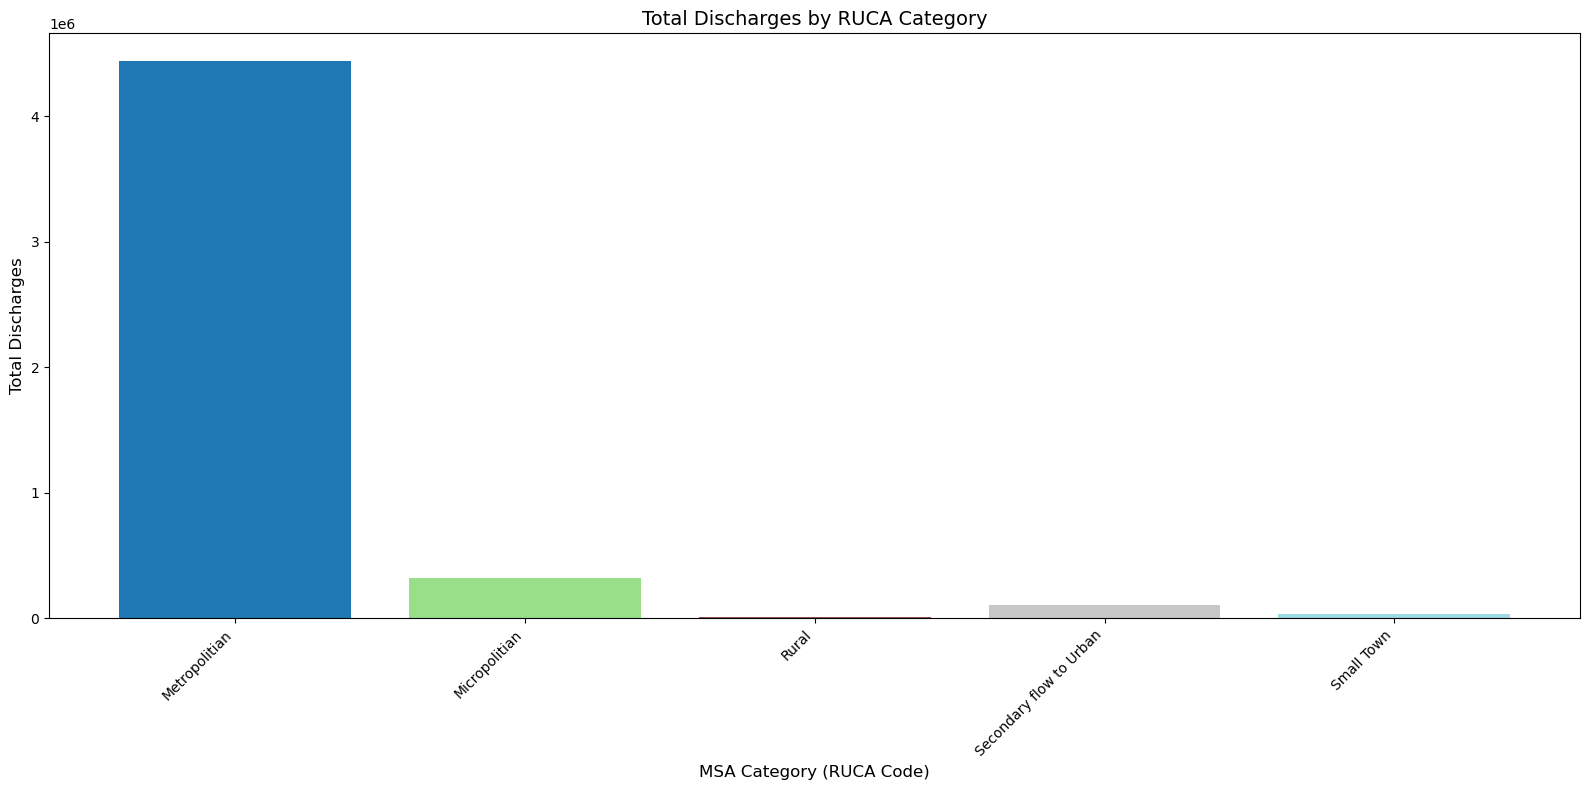

In [27]:
# Cleansing of columns
df3.columns = df3.columns.str.strip()

for col in ['Tot_Dschrgs', 'Avg_Tot_Pymt_Amt', 'Avg_Mdcr_Pymt_Amt']:
    df3[col] = pd.to_numeric(df3[col], errors='coerce')

#  Calculate total amounts per row
df3['Total_Tot_Paid'] = df3['Tot_Dschrgs'] * df3['Avg_Tot_Pymt_Amt']
df3['Total_Medicare_Paid'] = df3['Tot_Dschrgs'] * df3['Avg_Mdcr_Pymt_Amt']

# Group by MSA category (RUCA description)
grouped_counts = df3.groupby('Rndrng_Prvdr_RUCA')['Tot_Dschrgs'].sum().sort_index()

plt.figure(figsize=(16, 8))

x_labels = grouped_counts.index.astype(str)
x_pos = np.arange(len(x_labels))

# For colored bars
colors = plt.cm.tab20(np.linspace(0, 1, len(x_labels)))

# Plot each bar with a unique color
bars = plt.bar(x_pos, grouped_counts.values, color=colors)

plt.xlabel('MSA Category (RUCA Code)', fontsize=12)
plt.ylabel('Total Discharges', fontsize=12)
plt.title('Total Discharges by RUCA Category', fontsize=14)
plt.xticks(x_pos, x_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()